In [1]:
#importing modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#reading data and display
df=pd.read_excel("Lung Capacity.xlsx")
df.head(10)

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Risk
0,6.475,6,62.1,no,male,0
1,10.125,18,74.7,yes,female,0
2,9.550,16,69.7,no,female,1
3,11.125,14,71.0,no,male,0
4,4.800,5,56.9,no,male,0
5,6.225,11,58.7,no,female,0
6,4.950,8,63.3,no,male,1
7,7.325,11,70.4,no,male,0
8,8.875,15,70.5,no,male,0
9,6.800,11,59.2,no,male,0


PART 1

In [3]:
#data exploration 
print("Data size:")
df.size

Data size:


4350

In [4]:
print("Data shape:")
df.shape

Data shape:


(725, 6)

In [5]:
print("Data columns:")
df.columns

Data columns:


Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke', 'Gender',
       'Risk'],
      dtype='object')

In [6]:
print("Data summary:")
df.describe()

Data summary:


,LungCap(cc),Age( years),Height(inches),Risk
count,725.000000,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276,0.226207
std,2.662008,4.004750,7.202144,0.418663
min,0.507000,3.000000,45.300000,0.000000
25%,6.150000,9.000000,59.900000,0.000000
50%,8.000000,13.000000,65.400000,0.000000
75%,9.800000,15.000000,70.300000,0.000000
max,14.675000,19.000000,81.800000,1.000000


In [7]:
print("Checking for null values:")
df.isnull().sum()

Checking for null values:


LungCap(cc)       0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Risk              0
dtype: int64

In [8]:
print("Data types:")
df.dtypes

Data types:


LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Risk                int64
dtype: object

In [9]:
print("Unique values appearance for Risk:")
df["Risk"].unique()

Unique values appearance for Risk:


array([0, 1], dtype=int64)

#Categorical data conversion to Numeric Data


In [10]:
# Performing One-Hot Encoding with get_dummies
encoded_data = pd.get_dummies(df, columns=['Smoke','Gender'], prefix=['Smoke', 'Gender'])

# Saving the encoded DataFrame to a new CSV file
encoded_data.to_csv('df_encoded.csv', index=False)


In [11]:
#reading encoded data and display 
df1= pd.read_csv('df_encoded.csv')
df1.head(10)

,LungCap(cc),Age( years),Height(inches),Risk,Smoke_no,Smoke_yes,Gender_female,Gender_male
0,6.475,6,62.1,0,1,0,0,1
1,10.125,18,74.7,0,0,1,1,0
2,9.550,16,69.7,1,1,0,1,0
3,11.125,14,71.0,0,1,0,0,1
4,4.800,5,56.9,0,1,0,0,1
5,6.225,11,58.7,0,1,0,1,0
6,4.950,8,63.3,1,1,0,0,1
7,7.325,11,70.4,0,1,0,0,1
8,8.875,15,70.5,0,1,0,0,1
9,6.800,11,59.2,0,1,0,0,1


In [12]:
# Separating features (X) and target (Y) variables
X = df1.drop(columns=['Risk'])
Y = df1['Risk']

In [13]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

NAIVE BAYES CLASSIFIER 

In [14]:
# Initializing the Naive Bayes classifier
nb_classifier = GaussianNB()

In [15]:
# Training the classifier on the training data
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [16]:
# Making predictions on the test data
Y_pred = nb_classifier.predict(X_test)

In [17]:
# Calculating and print the accuracy for naive bayes method
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [18]:
# Printing the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy
accuracy1 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print the Z-score
z_scores = np.abs((Y_test - Y_pred) / np.std(Y_test))
print("Z-scores:")
print(z_scores)

Confusion Matrix:
[[164   0]
 [ 54   0]]
Accuracy: 0.75
Z-scores:
326    0.000000
518    0.000000
554    0.000000
33     2.316529
375    2.316529
         ...   
434    0.000000
635    0.000000
479    2.316529
382    0.000000
306    0.000000
Name: Risk, Length: 218, dtype: float64


DECISION TREE CLASSIFIER

In [19]:
# Initializing the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=108)

In [20]:
# Training the classifier on the training data
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=108)

In [21]:
# Making predictions on the test data
Y_pred = dt_classifier.predict(X_test)

In [22]:
# Calculating and printing the accuracy for decision tree
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [23]:
# Counting occurrences of each class in the 'Risk' column
class_counts = df1['Risk'].value_counts()

# Print the class counts
print(class_counts)

0    561
1    164
Name: Risk, dtype: int64


In [24]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print the Z-score
z_scores = np.abs((Y_test - Y_pred) / np.std(Y_test))
print("Z-scores:")
print(z_scores)

Confusion Matrix:
[[132  32]
 [ 45   9]]
Accuracy: 0.65
Z-scores:
326    0.000000
518    0.000000
554    2.316529
33     2.316529
375    2.316529
         ...   
434    0.000000
635    0.000000
479    2.316529
382    0.000000
306    0.000000
Name: Risk, Length: 218, dtype: float64


IDENTIFYING OPTIMAL RANDOM STATE 

Optimal Random State: 42


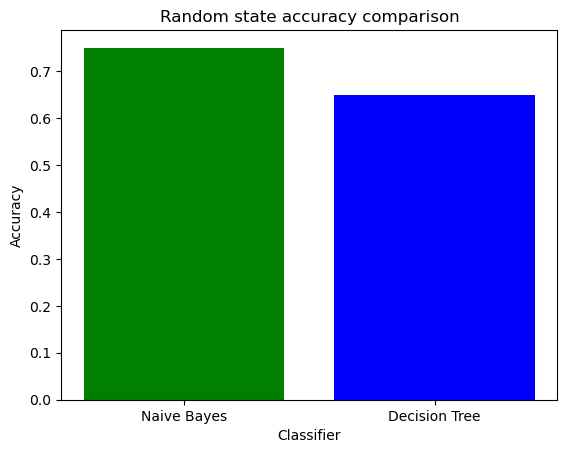

In [25]:
#plotting graphs
Y=[0.75,0.65]
X=["Naive Bayes","Decision Tree"]
plt.bar(X,Y,color=['green','blue'])
plt.title("Random state accuracy comparison")
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
print("Optimal Random State: 42")

PART 2

MIN MAX SCALER

In [26]:
#importing modules
from sklearn.preprocessing import MinMaxScaler

In [27]:
#initializing scaler 
scaler=MinMaxScaler()

In [28]:
#scale data and display
minmaxnormalized=pd.DataFrame(scaler.fit_transform(df1))
print("Min Max Normalized Data:")
minmaxnormalized

Min Max Normalized Data:


,0,1,2,3,4,5,6,7
0,0.421231,0.1875,0.460274,0.0,1.0,0.0,0.0,1.0
1,0.678854,0.9375,0.805479,0.0,0.0,1.0,1.0,0.0
2,0.638269,0.8125,0.668493,1.0,1.0,0.0,1.0,0.0
3,0.749435,0.6875,0.704110,0.0,1.0,0.0,0.0,1.0
4,0.303007,0.1250,0.317808,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
720,0.368295,0.3750,0.293151,0.0,1.0,0.0,1.0,0.0
721,0.602979,0.9375,0.731507,1.0,0.0,1.0,0.0,1.0
722,0.235954,0.5000,0.416438,0.0,0.0,1.0,1.0,0.0
723,0.657679,0.7500,0.536986,0.0,1.0,0.0,1.0,0.0


STANDARD SCALER

In [29]:
#importing modules
from sklearn.preprocessing import StandardScaler

In [30]:
#initializing scaler 
scaler=StandardScaler()

In [31]:
#scale data and display
standardnormalized=pd.DataFrame(scaler.fit_transform(df1))
print("Standard Normalized Data:")
standardnormalized

Standard Normalized Data:


,0,1,2,3,4,5,6,7
0,-0.521826,-1.580939,-0.380187,-0.540680,0.344713,-0.344713,-0.987662,0.987662
1,0.850266,1.417572,1.370499,-0.540680,-2.900963,2.900963,1.012492,-1.012492
2,0.634114,0.917820,0.675782,1.849522,0.344713,-0.344713,1.012492,-1.012492
3,1.226181,0.418068,0.856409,-0.540680,0.344713,-0.344713,-0.987662,0.987662
4,-1.151485,-1.830815,-1.102693,-0.540680,0.344713,-0.344713,-0.987662,0.987662
...,...,...,...,...,...,...,...,...
720,-0.803763,-0.831311,-1.227742,-0.540680,0.344713,-0.344713,1.012492,-1.012492
721,0.446156,1.417572,0.995352,1.849522,-2.900963,2.900963,-0.987662,0.987662
722,-1.508605,-0.331559,-0.602497,-0.540680,-2.900963,2.900963,1.012492,-1.012492
723,0.737491,0.667944,0.008854,-0.540680,0.344713,-0.344713,1.012492,-1.012492


ROBUST SCALER

In [32]:
#importing modules
from sklearn.preprocessing import RobustScaler

In [33]:
#initializing scaler 
scaler=RobustScaler()

In [34]:
#scale data and display
robustnormalized=pd.DataFrame(scaler.fit_transform(df1))
print("Robust Scaler Normalized Data:")
robustnormalized

Robust Scaler Normalized Data:


,0,1,2,3,4,5,6,7
0,-0.417808,-1.166667,-0.317308,0.0,0.0,0.0,0.0,0.0
1,0.582192,0.833333,0.894231,0.0,-1.0,1.0,1.0,-1.0
2,0.424658,0.500000,0.413462,1.0,0.0,0.0,1.0,-1.0
3,0.856164,0.166667,0.538462,0.0,0.0,0.0,0.0,0.0
4,-0.876712,-1.333333,-0.817308,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
720,-0.623288,-0.666667,-0.903846,0.0,0.0,0.0,1.0,-1.0
721,0.287671,0.833333,0.634615,1.0,-1.0,1.0,0.0,0.0
722,-1.136986,-0.333333,-0.471154,0.0,-1.0,1.0,1.0,-1.0
723,0.500000,0.333333,-0.048077,0.0,0.0,0.0,1.0,-1.0


CLASSIFIER IMPLEMENTATION

Robust Normalizer: Decision Tree Classifier 

In [35]:
# Separating features (X) and target (Y) variables
#Robust Normalizer
#Rosk feature is column 3
X = robustnormalized.drop(columns=[3])
Y = robustnormalized[3]

In [36]:
#Decision Tree CLassifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

In [37]:
# Training the classifier on the training data
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Making predictions on the test data
Y_pred = dt_classifier.predict(X_test)

In [39]:
# Calculating and printing the accuracy for decision tree
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [40]:
# Counting occurrences of each class in the 'Risk' column
class_counts = robustnormalized[3].value_counts()

# Print the class counts
print(class_counts)

0.0    561
1.0    164
Name: 3, dtype: int64


In [41]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print the Z-score
z_scores = np.abs((Y_test - Y_pred) / np.std(Y_test))
print("Z-scores:")
print(z_scores)

Confusion Matrix:
[[131  33]
 [ 43  11]]
Accuracy: 0.65
Z-scores:
326    0.000000
518    0.000000
554    2.316529
33     2.316529
375    2.316529
         ...   
434    0.000000
635    0.000000
479    2.316529
382    0.000000
306    0.000000
Name: Risk, Length: 218, dtype: float64


Robust Normalizer: Naive Bayes Classifier 

In [42]:
# Separating features (X) and target (Y) variables
#Robust Normalizer
#Rosk feature is column 3
X = robustnormalized.drop(columns=[3])
Y = robustnormalized[3]

## ML lab turn date: 15.09.23

In [43]:
numerical_features=['LungCap(cc)','Age(years)','Height(inches)']
categorical_features=['Smoke','Gender']
dummy=pd.get_dummies(df,drop_first=True)
dummy.shape
Y=dummy[['Risk']]
X=dummy.drop(columns=['Risk'])
X

,LungCap(cc),Age( years),Height(inches),Smoke_yes,Gender_male
0,6.475,6,62.1,0,1
1,10.125,18,74.7,1,0
2,9.550,16,69.7,0,0
3,11.125,14,71.0,0,1
4,4.800,5,56.9,0,1
...,...,...,...,...,...
720,5.725,9,56.0,0,0
721,9.050,18,72.0,1,1
722,3.850,11,60.5,1,0
723,9.825,15,64.9,0,0


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
len(x_train),len(x_test),len(y_train),len(y_test)

(543, 182, 543, 182)

In [51]:
from imblearn.over_sampling import SMOTE
SB=SMOTE(random_state=42)
x_train_new,y_train_new=SB.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_new.value_counts())

Risk
0       416
1       127
dtype: int64
Risk
0       416
1       416
dtype: int64


K Fold Cross Validation


In [57]:
#dummy data 
from numpy import array 
from sklearn.model_selection import KFold 

#data sample 
data=array([0.1,0.3,0.2,0.4,0.5,0.6])
#prepare cross validation 
kfold=KFold(3)
#enumerate splits 
for train,test in kfold.split(data):
    print("train: %s , test: %s"  % (data[train],data[test]))

train: [0.2 0.4 0.5 0.6] , test: [0.1 0.3]
train: [0.1 0.3 0.5 0.6] , test: [0.2 0.4]
train: [0.1 0.3 0.2 0.4] , test: [0.5 0.6]


In [59]:
from sklearn.tree import DecisionTreeClassifier 
regressor=DecisionTreeClassifier()
regressor.fit(x_train,y_train) #training of classifier

DecisionTreeClassifier()

In [60]:
from sklearn.model_selection import cross_val_score

In [77]:
accuracies=cross_val_score(estimator=regressor, X=x_train,y=y_train,cv=15)

In [78]:
accuracies

array([0.64864865, 0.64864865, 0.72972973, 0.61111111, 0.5       ,
       0.66666667, 0.61111111, 0.61111111, 0.66666667, 0.55555556,
       0.75      , 0.72222222, 0.72222222, 0.58333333, 0.61111111])

In [79]:
accuracies.mean()

0.6425425425425426

In [80]:
print("Accuracies: cv=5; accuracy=0.66")
print("Accuracies: cv=10; accuracy=0.65")
print("Accuracies: cv=5; accuracy=0.64")

Accuracies: cv=5; accuracy=0.66
Accuracies: cv=10; accuracy=0.65
Accuracies: cv=5; accuracy=0.64


PCA technique

In [81]:
from sklearn.decomposition import PCA 
numerical_features=['LungCap(cc)','Age(years)','Height(inches)']
categorical_features=['Smoke','Gender']
dummy=pd.get_dummies(df,drop_first=True)
dummy.shape
Y=dummy[['Risk']]
X=dummy.drop(columns=['Risk'])
X

,LungCap(cc),Age( years),Height(inches),Smoke_yes,Gender_male
0,6.475,6,62.1,0,1
1,10.125,18,74.7,1,0
2,9.550,16,69.7,0,0
3,11.125,14,71.0,0,1
4,4.800,5,56.9,0,1
...,...,...,...,...,...
720,5.725,9,56.0,0,0
721,9.050,18,72.0,1,1
722,3.850,11,60.5,1,0
723,9.825,15,64.9,0,0


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
len(x_train),len(x_test),len(y_train),len(y_test)

(543, 182, 543, 182)

In [83]:
pca=PCA(n_components=2)

In [84]:
x_train_pca=pca.fit_transform(x_train)

In [87]:

x_train_pca

array([[-14.65126739,   3.2781281 ],
       [ -7.14838182,   1.34350843],
       [ 14.75722028,  -0.86220139],
       ...,
       [  9.28971058,  -0.36945831],
       [  4.50628   ,  -1.70828976],
       [-13.70965993,  -0.96712622]])

t-SNE 

In [89]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=3)
x_train_tsne=tsne.fit_transform(x_train)
x_train_tsne

C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  7.6551776, -72.191925 ,   3.231107 ],
       [ 41.955048 , -45.508183 ,  11.704526 ],
       [-38.387295 ,  37.553356 , -38.622463 ],
       ...,
       [-18.477688 ,  53.07108  , -17.407686 ],
       [ -6.2411084,  46.713078 ,  18.346964 ],
       [ -1.9285154, -63.446705 , -19.781797 ]], dtype=float32)

In [90]:
tsne=TSNE(n_components=3)
x_test_tsne=tsne.fit_transform(x_test)
x_test_tsne

C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-9.54927292e+01,  2.07830544e+01, -1.08894524e+02],
       [ 3.24868202e+01,  5.86519012e+01, -1.26433952e+02],
       [ 1.05018959e+01, -1.19784264e+02,  2.59802036e+01],
       [-7.56577301e+01,  1.08522491e+02,  1.55319616e-01],
       [ 2.95775051e+01, -6.40988922e+01, -4.50324326e+01],
       [-1.06695648e+02, -3.03670063e+01, -3.62512665e+01],
       [-8.81999435e+01, -8.27203827e+01,  2.25605316e+01],
       [-2.32504234e+01, -8.76280365e+01, -9.17231827e+01],
       [ 3.40615120e+01, -6.50092602e+00,  9.01346588e+01],
       [ 2.37249184e+01, -1.12410904e+02,  8.53926544e+01],
       [-2.84690571e+01,  5.64218941e+01,  1.03523933e+02],
       [-3.70504951e+01,  3.18721180e+01,  3.23750839e+01],
       [-6.89648361e+01, -1.38249420e+02,  1.01680107e+02],
       [-6.36140480e+01, -2.38569088e+01, -8.55790405e+01],
       [-6.24472275e+01,  2.71070938e+01, -1.17043800e+01],
       [-5.24322701e+01, -6.58116608e+01, -2.81688461e+01],
       [ 1.35964386e+02,  3.55411530e+01

CountVectorizer

In [102]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
data=pd.read_csv("C:\\Users\\PRUTHA\\Desktop\\third year sem 1\\ML\\Lab_1\\spam.csv",encoding='latin-1')
df=data[['v1','v2']]

In [103]:
x=np.array(df['v1'])
y=np.array(df['v2'])
cv=CountVectorizer() 
X=cv.fit_transform(x) #fit the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
clf=MultinomialNB()
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)

#ClassificationReport 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                precision    recall  f1-score   support

                                               

C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRUTHA\anaconda3\lib\site-packages\sklearn\metrics\